<a href="https://colab.research.google.com/github/FariqJavier/Object-Detection-Model/blob/main/OCR_pre_Trained_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install datasets

In [ ]:
from datasets import load_dataset_builder
from datasets import list_datasets

ds_builder = load_dataset_builder('naver-clova-ix/cord-v2')
ds_builder.info.description

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


'https://github.com/clovaai/cord'

In [ ]:
from datasets import load_dataset, Image

train_dataset = load_dataset('naver-clova-ix/cord-v2', split="train")
val_dataset = load_dataset('naver-clova-ix/cord-v2', split="validation")

In [ ]:
train_images_B1 = train_dataset[:300]["image"]
train_labels_B1 = train_dataset[:300]["ground_truth"]

In [ ]:
train_images_B2 = train_dataset[300:600]["image"]
train_labels_B2 = train_dataset[300:600]["ground_truth"]

In [ ]:
validation_images = val_dataset[:50]["image"]
validation_labels = val_dataset[:50]["ground_truth"]

In [ ]:
import json

# Parse the dataset string into a Python dictionary
train_labels_B1_json =[]
train_labels_B2_json =[]
for index in range(len(train_labels_B1)):
  train_labels_B1_json.append(json.loads(train_labels_B1[index]))

for index in range(len(train_labels_B2)):
  train_labels_B2_json.append(json.loads(train_labels_B2[index]))

In [ ]:
# Parse the dataset string into a Python dictionary
validation_labels_json =[]
for index in range(len(validation_labels)):
  validation_labels_json.append(json.loads(validation_labels[index]))

In [ ]:
formatted_json = json.dumps(train_labels_B1_json[35], indent=4)
print(formatted_json)

{
    "gt_parse": {
        "menu": {
            "nm": "Cuka Apel Moringa",
            "unitprice": "289000",
            "cnt": "1",
            "price": "289000"
        },
        "sub_total": {
            "subtotal_price": "289000"
        },
        "total": {
            "cashprice": "300000",
            "changeprice": "11000"
        }
    },
    "meta": {
        "version": "2.0.0",
        "split": "train",
        "image_id": 35,
        "image_size": {
            "width": 576,
            "height": 864
        }
    },
    "valid_line": [
        {
            "words": [
                {
                    "quad": {
                        "x2": 228,
                        "y3": 335,
                        "x3": 227,
                        "y4": 327,
                        "x1": 32,
                        "y1": 301,
                        "x4": 31,
                        "y2": 309
                    },
                    "is_key": 0,
                    "row_

In [ ]:
train_labels_valid_lines_B1 = []
train_labels_valid_lines_B2 = []
for index in range(len(train_labels_B1_json)):
  train_labels_valid_lines_B1.append(train_labels_B1_json[index]["valid_line"])
for index in range(len(train_labels_B2_json)):
  train_labels_valid_lines_B2.append(train_labels_B2_json[index]["valid_line"])

In [ ]:
validation_labels_valid_lines = []
for index in range(len(validation_labels_json)):
  validation_labels_valid_lines.append(validation_labels_json[index]["valid_line"])

In [ ]:
formatted_json = json.dumps(train_labels_valid_lines_B1[10], indent=4)
print(formatted_json)

[
    {
        "words": [
            {
                "quad": {
                    "x2": 170,
                    "y3": 231,
                    "x3": 171,
                    "y4": 232,
                    "x1": 162,
                    "y1": 218,
                    "x4": 162,
                    "y2": 219
                },
                "is_key": 0,
                "row_id": 1827478,
                "text": "1"
            }
        ],
        "category": "menu.cnt",
        "group_id": 3,
        "sub_group_id": 0
    },
    {
        "words": [
            {
                "quad": {
                    "x2": 192,
                    "y3": 232,
                    "x3": 192,
                    "y4": 232,
                    "x1": 171,
                    "y1": 218,
                    "x4": 172,
                    "y2": 218
                },
                "is_key": 0,
                "row_id": 1827478,
                "text": "Viet"
            },
            {
       

In [ ]:
train_label_words_B1 = []
train_label_words_B2 = []
train_label_boxes_B1 = []
train_label_boxes_B2 = []
for data_entry in train_labels_valid_lines_B1:
  label_word = [word["text"] for n_element in data_entry for word in n_element["words"]]
  label_box = [word["quad"] for n_element in data_entry for word in n_element["words"]]
  train_label_words_B1.append(label_word)
  train_label_boxes_B1.append(label_box)
for data_entry in train_labels_valid_lines_B2:
  label_word = [word["text"] for n_element in data_entry for word in n_element["words"]]
  label_box = [word["quad"] for n_element in data_entry for word in n_element["words"]]
  train_label_words_B2.append(label_word)
  train_label_boxes_B2.append(label_box)

In [ ]:
validation_label_words = []
validation_label_boxes = []
for data_entry in validation_labels_valid_lines:
  label_word = [word["text"] for n_element in data_entry for word in n_element["words"]]
  label_box = [word["quad"] for n_element in data_entry for word in n_element["words"]]
  validation_label_words.append(label_word)
  validation_label_boxes.append(label_box)

In [ ]:
train_label_words_B1[10]

['1',
 'Viet',
 'Milk',
 'Coffee',
 '25.000',
 '+Hot',
 '+M',
 'Subtotal',
 '25.000',
 'Total',
 '25.000',
 'CASH',
 '30.000',
 'Kembalian',
 '5.000']

In [ ]:
train_label_boxes_B1[10]

[{'x2': 170,
  'y3': 231,
  'x3': 171,
  'y4': 232,
  'x1': 162,
  'y1': 218,
  'x4': 162,
  'y2': 219},
 {'x2': 192,
  'y3': 232,
  'x3': 192,
  'y4': 232,
  'x1': 171,
  'y1': 218,
  'x4': 172,
  'y2': 218},
 {'x2': 218,
  'y3': 232,
  'x3': 217,
  'y4': 232,
  'x1': 192,
  'y1': 220,
  'x4': 192,
  'y2': 220},
 {'x2': 248,
  'y3': 234,
  'x3': 248,
  'y4': 234,
  'x1': 218,
  'y1': 217,
  'x4': 218,
  'y2': 217},
 {'x2': 384,
  'y3': 230,
  'x3': 384,
  'y4': 230,
  'x1': 348,
  'y1': 216,
  'x4': 348,
  'y2': 216},
 {'x2': 188,
  'y3': 244,
  'x3': 188,
  'y4': 243,
  'x1': 166,
  'y1': 231,
  'x4': 166,
  'y2': 232},
 {'x2': 180,
  'y3': 254,
  'x3': 180,
  'y4': 254,
  'x1': 164,
  'y1': 242,
  'x4': 164,
  'y2': 242},
 {'x2': 200,
  'y3': 278,
  'x3': 200,
  'y4': 278,
  'x1': 158,
  'y1': 266,
  'x4': 158,
  'y2': 266},
 {'x2': 386,
  'y3': 277,
  'x3': 386,
  'y4': 278,
  'x1': 349,
  'y1': 266,
  'x4': 350,
  'y2': 266},
 {'x2': 186,
  'y3': 290,
  'x3': 186,
  'y4': 290,
  '

In [ ]:
import copy

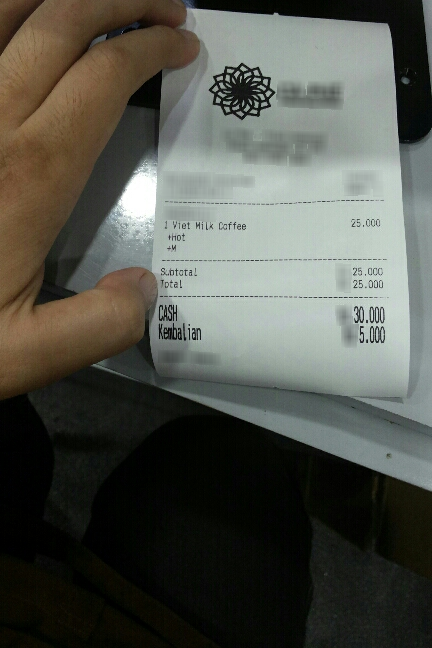

In [ ]:
display_image = train_images_B1[10].copy()
display_image

In [ ]:
import numpy as np
import cv2
from PIL import Image, ImageDraw

In [ ]:
def draw_bbox_on_image(image, bbox):
  np_boxes = np.array(bbox)
  image_copy = image.copy()

  # Create an ImageDraw object
  draw = ImageDraw.Draw(image_copy)
  bbox_color = (0, 255, 0)

  for bbox in np_boxes:
    # Extract coordinates from each bounding box
    x1, y1, x2, y2, x3, y3, x4, y4 = bbox['x1'], bbox['y1'], bbox['x2'], bbox['y2'], bbox['x3'], bbox['y3'], bbox['x4'], bbox['y4']
    # Find the minimum and maximum x and y coordinates
    min_x = min(x1, x2, x3, x4)  # Find the minimum value between x1, x2, x3, x4
    max_x = max(x1, x2, x3, x4)  # Find the maximum value between x1, x2, x3, x4
    min_y = min(y1, y2, y3, y4)  # Find the minimum value between y1, y2, y3, y4
    max_y = max(y1, y2, y3, y4)  # Find the maximum value between y1, y2, y3, y4

    # Draw rectangle on the image
    draw.rectangle([(min_x, min_y), (max_x, max_y)], fill=None, outline=bbox_color, width=1)

  return image_copy

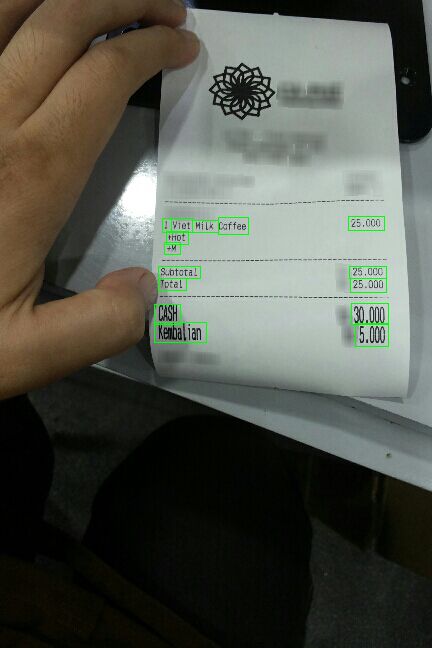

In [ ]:
display_image = draw_bbox_on_image(train_images_B1[10], train_label_boxes_B1[10])
display_image

In [ ]:
print("Image 10 width: ", train_images_B1[10].width)
print("Image 10 height: ", train_images_B1[10].height)

Image 10 width:  432
Image 10 height:  648


In [ ]:
def resize_image_and_bbox(image, bbox, resize_dim=(224, 224)):
    # Resize the image
    image_copy = image.copy()
    resized_image = image_copy.resize(resize_dim)
    np_boxes = np.array(bbox)

    # Scale the bounding box coordinates
    scaled_bbox = []
    for bbox in np_boxes:
        # Extract coordinates from each bounding box
        x1, y1, x2, y2, x3, y3, x4, y4 = bbox['x1'], bbox['y1'], bbox['x2'], bbox['y2'], bbox['x3'], bbox['y3'], bbox['x4'], bbox['y4']
        # Find the minimum and maximum x and y coordinates
        min_x = min(x1, x2, x3, x4)
        max_x = max(x1, x2, x3, x4)
        min_y = min(y1, y2, y3, y4)
        max_y = max(y1, y2, y3, y4)
        # Scale the minimum and maximum x and y coordinates
        scaled_x1 = int(min_x * (resize_dim[0] / image.width))
        scaled_y1 = int(min_y * (resize_dim[1] / image.height))
        scaled_x2 = int(max_x * (resize_dim[0] / image.width))
        scaled_y2 = int(max_y * (resize_dim[1] / image.height))
        scaled_bbox.append((scaled_x1, scaled_y1, scaled_x2, scaled_y2))

    return resized_image, scaled_bbox

In [ ]:
resized_images_B1 = []
resized_images_B2 = []
scaled_boxes_B1 = []
scaled_boxes_B2 = []
for image, label in zip(train_images_B1, train_label_boxes_B1):
  resized_image, scaled_box =  resize_image_and_bbox(image, label)
  resized_images_B1.append(resized_image)
  scaled_boxes_B1.append(scaled_box)
for image, label in zip(train_images_B2, train_label_boxes_B2):
  resized_image, scaled_box =  resize_image_and_bbox(image, label)
  resized_images_B2.append(resized_image)
  scaled_boxes_B2.append(scaled_box)

In [ ]:
validation_resized_images = []
validation_scaled_boxes = []
for image, label in zip(validation_images, validation_label_boxes):
  resized_image, scaled_box =  resize_image_and_bbox(image, label)
  validation_resized_images.append(resized_image)
  validation_scaled_boxes.append(scaled_box)

In [ ]:
print("Resized image width: ", resized_images_B1[10].width)
print("Resized image height: ", resized_images_B1[10].height)

Resized image width:  224
Resized image height:  224


In [ ]:
print("Len resized images: ", len(resized_images_B1) + len(resized_images_B2))
print("Len scaled boxes: ", len(scaled_boxes_B1) + len(scaled_boxes_B2))

Len resized images:  600
Len scaled boxes:  600


In [ ]:
def draw_scaled_bbox_on_resized_image(image, bbox):
  bbox_color = (0, 255, 0)
  np_boxes = np.array(bbox)
  # Create an ImageDraw object
  image_copy = image.copy()
  draw = ImageDraw.Draw(image_copy)

  for bbox in np_boxes:
    # Extract coordinates from each bounding box
    x1, y1, x2, y2= bbox[0], bbox[1], bbox[2], bbox[3]

    # Draw rectangle on the image
    draw.rectangle([(x1, y1), (x2, y2)], fill=None, outline=bbox_color, width=1)

  return image_copy

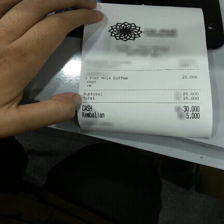

In [ ]:
resized_images_B1[10]

In [ ]:
scaled_boxes_B1[10]

[(84, 75, 88, 80),
 (88, 75, 99, 80),
 (99, 76, 113, 80),
 (113, 75, 128, 80),
 (180, 74, 199, 79),
 (86, 79, 97, 84),
 (85, 83, 93, 87),
 (81, 91, 103, 96),
 (180, 91, 200, 96),
 (81, 96, 96, 100),
 (181, 96, 200, 100),
 (79, 105, 93, 112),
 (182, 104, 201, 112),
 (79, 111, 106, 118),
 (184, 111, 201, 119)]

In [ ]:
display_image = draw_scaled_bbox_on_resized_image(resized_images_B1[10], scaled_boxes_B1[10])

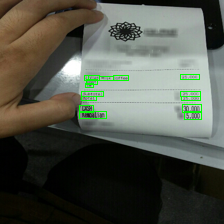

In [ ]:
display_image

In [ ]:
#### MATRIKS BOUNDING BOX THD GAMBAR ####

In [ ]:
# Fungsi untuk membuat matriks target dari koordinat bounding box
def create_target_matrix(image_shape, bounding_boxes):
    # Buat matriks target kosong dengan ukuran gambar
    target_matrix = np.zeros(image_shape[:2], dtype=np.float32)

    # Loop melalui setiap bounding box
    for box in bounding_boxes:
        x_min, y_min, x_max, y_max = box[0], box[1], box[2], box[3]

        # # Tentukan koordinat relatif terhadap gambar
        # relative_x_min = x_min / image_shape[1]
        # relative_y_min = y_min / image_shape[0]
        # relative_x_max = x_max / image_shape[1]
        # relative_y_max = y_max / image_shape[0]

        # Tentukan indeks piksel dalam kotak pembatas kata dan atur nilainya menjadi 1
        for y in range(int(y_min), int(y_max)):
            for x in range(int(x_min), int(x_max)):
                target_matrix[y, x] = 255

    return target_matrix

In [ ]:
# Buat matriks target
matrix_scaled_boxes_B1 = []
matrix_scaled_boxes_B2 = []
for bbox in scaled_boxes_B1:
  matrix_boxes = create_target_matrix((224, 224), bbox)
  matrix_scaled_boxes_B1.append(matrix_boxes)
for bbox in scaled_boxes_B2:
  matrix_boxes = create_target_matrix((224, 224), bbox)
  matrix_scaled_boxes_B2.append(matrix_boxes)

In [ ]:
matrix_validation_scaled_boxes = []
for bbox in validation_scaled_boxes:
  matrix_boxes = create_target_matrix((224, 224), bbox)
  matrix_validation_scaled_boxes.append(matrix_boxes)

In [ ]:
matrix_scaled_boxes_B1[10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
def convert_to_combined_format(ground_truth_bboxes, ground_truth_labels):
  output_strings = []

  # for bbox, label in zip(ground_truth_bboxes, ground_truth_labels):
  #   bbox_string = ','.join([str(coord) for coord in bbox.values()])
  #   output_string = f"{bbox_string} {label}"
  #   output_strings.append(output_string)

  for bbox, label in zip(ground_truth_bboxes, ground_truth_labels):
    # Convert bounding box coordinates to string
    bbox_string = ','.join([str(coord) for coord in bbox])

    # Combine bounding box string with label
    output_string = f"{bbox_string} {label}"
    output_strings.append(output_string)

  return '\n'.join(output_strings)

In [ ]:
output_string = convert_to_combined_format(scaled_boxes_B1[10], train_label_words_B1[10])

print(output_string)

84,75,88,80 1
88,75,99,80 Viet
99,76,113,80 Milk
113,75,128,80 Coffee
180,74,199,79 25.000
86,79,97,84 +Hot
85,83,93,87 +M
81,91,103,96 Subtotal
180,91,200,96 25.000
81,96,96,100 Total
181,96,200,100 25.000
79,105,93,112 CASH
182,104,201,112 30.000
79,111,106,118 Kembalian
184,111,201,119 5.000


In [ ]:
train_label_string_B1 = []
train_label_string_B2 = []
for label, bbox in zip(train_label_words_B1, scaled_boxes_B1):
  output_string = convert_to_combined_format(bbox, label)
  train_label_string_B1.append(output_string)
for label, bbox in zip(train_label_words_B2, scaled_boxes_B2):
  output_string = convert_to_combined_format(bbox, label)
  train_label_string_B2.append(output_string)

In [ ]:
validation_label_string = []
for label, bbox in zip(validation_label_words, validation_scaled_boxes):
  output_string = convert_to_combined_format(bbox, label)
  validation_label_string.append(output_string)

In [ ]:
print(train_label_string_B1[10])

84,75,88,80 1
88,75,99,80 Viet
99,76,113,80 Milk
113,75,128,80 Coffee
180,74,199,79 25.000
86,79,97,84 +Hot
85,83,93,87 +M
81,91,103,96 Subtotal
180,91,200,96 25.000
81,96,96,100 Total
181,96,200,100 25.000
79,105,93,112 CASH
182,104,201,112 30.000
79,111,106,118 Kembalian
184,111,201,119 5.000


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model

In [ ]:
# Persiapkan model ResNet50 tanpa lapisan teratas
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
# Freeze the base model layers (weights won't be updated during training)
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
# Choose `conv3_block4_out` as the last layer of your base model
last_layer = base_model.get_layer('conv3_block4_out')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 28, 28, 512)


In [ ]:
# Definisikan jumlah kotak bounding box yang ingin Anda prediksi
# num_classes = 2
num_boxes = 5

In [ ]:
# Tambahkan lapisan tambahan untuk deteksi teks
x = last_output
# Flatten the feature map
# x = layers.Flatten()(x)
# Add a fully connected layer for bounding box regression
# x = layers.Dense(4, activation='linear')(x)  # Output size 4 for bounding box coordinates
# Reshape the output to match the desired bounding box matrix format
# x = layers.Reshape((224, 224, 3))
x = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = layers.Conv2D(128, (1, 1), activation='relu', padding='same')(x)
x = layers.concatenate([last_output, x])
# # Add a dropout rate of 0.2
# x = layers.Dropout(0.2)(x)
# x = layers.Conv2D(3, (1, 1), activation='sigmoid')(x)
# # Resize the output to match the input image size
# x = layers.UpSampling2D(size=(8, 8))(x)  # Upsample to match (224, 224) input size
x = layers.Flatten()(x)
x = layers.Dense(4 * num_boxes, activation='linear')(x)
x = layers.Reshape((5,4))(x)

In [ ]:
# Combine ResNet50 base model with additional layers
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss="mse",
              metrics = ['accuracy', 'mae'])  # Use mean squared error as the loss function since we are predicting bounding box coordinates

In [ ]:
# Display model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
np_resized_images_B1 = []
np_resized_images_B2 = []
np_matrix_scaled_boxes_B1 = []
np_matrix_scaled_boxes_B2 = []
for image,bbox in zip(resized_images_B1, matrix_scaled_boxes_B1):
  np_resized_image = np.array(image)
  np_resized_image = np_resized_image / 255
  np_scaled_box = np.expand_dims(bbox, axis=-1)
  np_scaled_box = np.repeat(np_scaled_box, 3, axis=-1)
  np_resized_images_B1.append(np_resized_image)
  np_matrix_scaled_boxes_B1.append(np_scaled_box)
for image,bbox in zip(resized_images_B2, matrix_scaled_boxes_B2):
  np_resized_image = np.array(image)
  np_resized_image = np_resized_image / 255
  np_scaled_box = np.expand_dims(bbox, axis=-1)
  np_scaled_box = np.repeat(np_scaled_box, 3, axis=-1)
  np_resized_images_B2.append(np_resized_image)
  np_matrix_scaled_boxes_B2.append(np_scaled_box)

In [ ]:
np_resized_images_B1[10]

array([[[0.38431373, 0.29803922, 0.19607843],
        [0.39607843, 0.30196078, 0.20392157],
        [0.40392157, 0.30196078, 0.21568627],
        ...,
        [0.49019608, 0.51764706, 0.53333333],
        [0.50588235, 0.5372549 , 0.54509804],
        [0.51764706, 0.56078431, 0.56470588]],

       [[0.41176471, 0.3254902 , 0.22352941],
        [0.41176471, 0.32156863, 0.21568627],
        [0.41176471, 0.31372549, 0.22352941],
        ...,
        [0.49019608, 0.52156863, 0.52941176],
        [0.50588235, 0.5372549 , 0.54117647],
        [0.52156863, 0.55686275, 0.56078431]],

       [[0.41176471, 0.31764706, 0.21960784],
        [0.40784314, 0.30980392, 0.20784314],
        [0.4       , 0.29803922, 0.20784314],
        ...,
        [0.47843137, 0.50980392, 0.51764706],
        [0.51372549, 0.54117647, 0.54901961],
        [0.53333333, 0.55294118, 0.56078431]],

       ...,

       [[0.04313725, 0.03921569, 0.00392157],
        [0.03529412, 0.03921569, 0.00392157],
        [0.05098039, 0

In [ ]:
len(np_resized_images_B1)

300

In [ ]:
np_matrix_scaled_boxes_B1[10]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
len(matrix_scaled_boxes_B1)

300

In [ ]:
np_validation_resized_images = []
np_matrix_validation_scaled_boxes = []
for image,bbox in zip(validation_resized_images, matrix_validation_scaled_boxes):
  np_resized_image = np.array(image)
  np_resized_image = np_resized_image /255
  np_scaled_box = np.expand_dims(bbox, axis=-1)
  np_scaled_box = np.repeat(np_scaled_box, 3, axis=-1)
  np_validation_resized_images.append(np_resized_image)
  np_matrix_validation_scaled_boxes.append(np_scaled_box)

In [ ]:
np_validation_resized_images[10]

array([[[0.68235294, 0.63529412, 0.54509804],
        [0.69019608, 0.64313725, 0.55294118],
        [0.69019608, 0.64705882, 0.56470588],
        ...,
        [0.5372549 , 0.39215686, 0.01960784],
        [0.5372549 , 0.39215686, 0.01568627],
        [0.5372549 , 0.40392157, 0.01960784]],

       [[0.67843137, 0.63529412, 0.54901961],
        [0.68627451, 0.64313725, 0.55686275],
        [0.69019608, 0.64313725, 0.56470588],
        ...,
        [0.54117647, 0.39215686, 0.01568627],
        [0.5372549 , 0.39215686, 0.01568627],
        [0.5254902 , 0.38823529, 0.01568627]],

       [[0.6745098 , 0.62745098, 0.5372549 ],
        [0.67843137, 0.63137255, 0.54117647],
        [0.69019608, 0.64313725, 0.56078431],
        ...,
        [0.54901961, 0.4       , 0.01960784],
        [0.5372549 , 0.39607843, 0.01568627],
        [0.51764706, 0.38431373, 0.01568627]],

       ...,

       [[0.12941176, 0.06666667, 0.04313725],
        [0.11372549, 0.05490196, 0.03529412],
        [0.09803922, 0

In [ ]:
len(np_validation_resized_images)

50

In [ ]:
np_matrix_validation_scaled_boxes[10]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
len(matrix_validation_scaled_boxes)

50

In [ ]:
def data_generator(images, targets, batch_size=32):
    num_samples = len(images)
    while True:
        for offset in range(0, num_samples, batch_size):
            batch_images = []
            batch_targets = []
            for i in range(offset, min(offset + batch_size, num_samples)):
                image = images[i]
                target = targets[i]
                batch_images.append(image)
                batch_targets.append(target)
            yield np.array(batch_images), np.array(batch_targets)

In [ ]:
print("Train Image Len: ", len(np_resized_images_B1))

Train Image Len:  300


In [ ]:
print("Train Image Shape: ", np_resized_images_B1[10].shape)

Train Image Shape:  (224, 224, 3)


In [ ]:
print("Matriks Label Len: ", len(matrix_scaled_boxes_B1))

Matriks Label Len:  300


In [ ]:
print("Matriks Label Shape: ", np_matrix_scaled_boxes_B1[10].shape)

Matriks Label Shape:  (224, 224, 3)


In [ ]:
# Cari list koordinat dengan panjang minimum di dalam list A
min_coord_list = min(scaled_boxes_B1, key=len)

# Cetak panjang list koordinat minimum
print("Panjang list koordinat batch 1 minimum:", len(min_coord_list))

Panjang list koordinat batch 1 minimum: 5


In [ ]:
# Cari list koordinat dengan panjang minimum di dalam list A
min_coord_list = min(scaled_boxes_B2, key=len)

# Cetak panjang list koordinat minimum
print("Panjang list koordinat batch 2 minimum:", len(min_coord_list))

Panjang list koordinat batch 2 minimum: 5


In [ ]:
np_scaled_boxes_B1 = []
np_scaled_boxes_B2 = []
for bbox in scaled_boxes_B1:
  np_bbox = np.array(bbox)
  trunc_np_bbox = np_bbox[:5]
  np_scaled_boxes_B1.append(trunc_np_bbox)
for bbox in scaled_boxes_B2:
  np_bbox = np.array(bbox)
  trunc_np_bbox = np_bbox[:5]
  np_scaled_boxes_B2.append(trunc_np_bbox)

In [ ]:
np_scaled_boxes_B1[10]

array([[ 84,  75,  88,  80],
       [ 88,  75,  99,  80],
       [ 99,  76, 113,  80],
       [113,  75, 128,  80],
       [180,  74, 199,  79]])

In [ ]:
np_scaled_boxes_B1[10].shape

(5, 4)

In [ ]:
np_validation_scaled_boxes = []
for bbox in validation_scaled_boxes:
  np_bbox = np.array(bbox)
  trunc_np_bbox = np_bbox[:5]
  np_validation_scaled_boxes.append(trunc_np_bbox)

In [ ]:
np_validation_scaled_boxes[10]

array([[ 26,  99,  32, 104],
       [ 42,  99,  64, 105],
       [ 66, 100,  71, 105],
       [155, 102, 181, 108],
       [ 26, 105,  32, 110]])

In [ ]:
np_validation_scaled_boxes[10].shape

(5, 4)

In [ ]:
# train_generator = data_generator(np_resized_images_B1, np_matrix_scaled_boxes_B1, batch_size=32)
train_generator = data_generator(np_resized_images_B1, np_scaled_boxes_B1, batch_size=32)

In [ ]:
validation_generator = data_generator(np_validation_resized_images, np_validation_scaled_boxes, batch_size=32)

In [ ]:
# Train your model with your dataset
history = model.fit(train_generator, validation_data=(validation_generator),
          steps_per_epoch = 100,
          epochs=5,
          batch_size=32,
          validation_steps = 50,
          verbose = 2)

Epoch 1/5
100/100 - 1090s - loss: 2653.1245 - accuracy: 0.6708 - mae: 33.7525 - val_loss: 811.5173 - val_accuracy: 0.7440 - val_mae: 20.7319 - 1090s/epoch - 11s/step
Epoch 2/5
100/100 - 1077s - loss: 1036.3672 - accuracy: 0.6743 - mae: 23.4661 - val_loss: 810.9350 - val_accuracy: 0.7400 - val_mae: 20.3268 - 1077s/epoch - 11s/step
Epoch 3/5
100/100 - 1082s - loss: 1011.2452 - accuracy: 0.6742 - mae: 22.9532 - val_loss: 826.2660 - val_accuracy: 0.7400 - val_mae: 20.6676 - 1082s/epoch - 11s/step
Epoch 4/5
100/100 - 1082s - loss: 971.0447 - accuracy: 0.6871 - mae: 22.2901 - val_loss: 843.2552 - val_accuracy: 0.7480 - val_mae: 21.1028 - 1082s/epoch - 11s/step
Epoch 5/5
100/100 - 1085s - loss: 926.4088 - accuracy: 0.7044 - mae: 21.5271 - val_loss: 846.5014 - val_accuracy: 0.7520 - val_mae: 21.1492 - 1085s/epoch - 11s/step


In [ ]:
import matplotlib.pyplot as plt

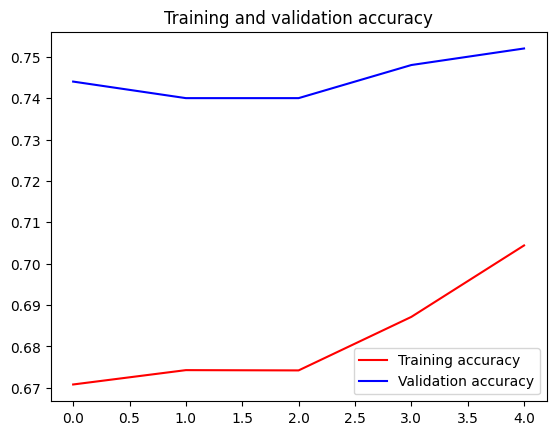

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

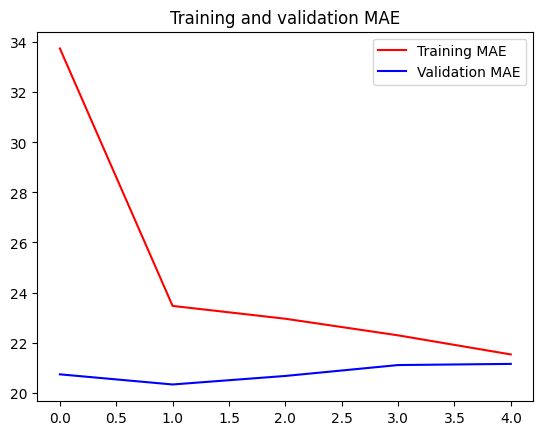

<Figure size 640x480 with 0 Axes>

In [ ]:
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(len(acc))

plt.plot(epochs, mae, 'r', label='Training MAE')
plt.plot(epochs, val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# test_generator = data_generator(np_resized_images_B2[:50], np_scaled_boxes_B2[:50], batch_size=32)
test_images = np_resized_images_B2[:50]
batch_test_images = np.expand_dims(test_images, axis=0)
batch_test_images = np.repeat(batch_test_images, 32, axis=0)
test_labels = np_scaled_boxes_B2[:50]
batch_test_labels = np.expand_dims(test_labels, axis=0)
batch_test_labels = np.repeat(batch_test_labels, 32, axis=0)

In [ ]:
len(batch_test_images)

32

In [ ]:
batch_test_images[10].shape

(50, 224, 224, 3)

In [ ]:
len(batch_test_labels)

32

In [ ]:
batch_test_labels[10].shape

(50, 5, 4)

In [ ]:
loss_value, accuracy_value = model.evaluate(batch_test_images, batch_test_labels, batch_size=32)

In [ ]:
print(f'Loss Value: {loss_value}')
print(f'Accuracy Value: {accuracy_value}')

In [ ]:
test_image = resized_images_B2[10]
test_image

In [ ]:
test_label = scaled_boxes_B2[10]
test_label

In [ ]:
display_image = draw_scaled_bbox_on_resized_image(test_image, test_label)
display_image

In [ ]:
np_test_image = np.array(test_image)
np_test_image.shape

In [ ]:
# Menambahkan dimensi batch
np_test_image = np.expand_dims(np_test_image, axis=0)
np_test_image.shape

In [ ]:
# Use the model for inference
predictions = model.predict(np_test_image)

In [ ]:
test_predict = predictions
test_predict

In [ ]:
test_label

In [ ]:
display_image = draw_scaled_bbox_on_resized_image(test_image, test_label)
display_image

In [ ]:
# Save the model if necessary
# model.save('text_detection_model.h5')

In [ ]:
# import os

In [ ]:
# os.makedirs("dataset")

In [ ]:
# os.chdir("dataset")

In [ ]:
# os.mkdir("train")
# os.mkdir("validation")
# os.mkdir("test")

In [ ]:
# import cv2
# import numpy as np

In [ ]:
# for index in range(len(train_images_B1)):
#   cv2.imwrite(f'train/img_{index+1}.jpg', np.array(train_images_B1[index]))

In [ ]:
# for index in range(len(train_images_B2)):
#   cv2.imwrite(f'train/img_{300+index+1}.jpg', np.array(train_images_B2[index]))

In [ ]:
# for index in range(len(train_label_string)):
#   with open(f"train/img_{index+1}.txt", 'w') as file:
#     file.write(train_label_string[index])

In [ ]:
# !zip -r /content/dataset.zip /content/dataset/

In [ ]:
# from google.colab import files
# files.download("/content/dataset.zip")

In [ ]:
# !git clone https://github.com/argman/EAST.git